# TP 7 Machines à vecteur de support
Dans ce TP, nous aimerions explorer le classifieur machineà vecteurs de support. Nous essayerons d'utiliser plusieurs noyaux et voir la difference entre leur capacité de séparation. 

Pour ceci, nous utiliserons plusieurs ensembles de données.

# Importation des librairies necessaires au travail

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn import svm
from sklearn import preprocessing

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [59]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(863, 3)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques, la dernière colonne represente la classe de l'exemple (positive ou négative).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [60]:
# Notons que nous navons pas besoin d'intercept pour l'MVS de sklearn
X=data[:,:-1]
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [46]:
print('X', X.shape ,' y ', y.shape)

X (863, 2)  y  (863, 1)


Pas besoin aussi de transformer les étiquettes (labels) en vecteurs

# Entrainement 
Nous utiliserons ici une MVS avec differents noyaux:
- Linéaire
- Gaussien (RBF)
- Polyomial

In [61]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y.ravel())
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y.ravel())
poly_svc = svm.SVC(kernel='poly', degree=3, C=1, gamma = 1, coef0=1).fit(X, y.ravel())
lin_svc = svm.LinearSVC(C=C).fit(X, y.ravel())

Mettons un lien avec ce que nous avons appris en regression linéaire

In [62]:
w = svc.coef_ # equivalent de theta
b = svc.intercept_[0] # equivalent de theta0
print(w,b)

[[-1.0022449   3.64731176]] -1.8675905935006316


Affichons la ligne séparatrice de cette MVS linéaire

In [63]:
w[0,1]

3.6473117571179188

In [64]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = (-(w[0,0] * x1_min + b) / w[0,1]), (-(w[0,0] * x1_max + b) / w[0,1])
print(x1_min, x1_max ,x2_min, x2_max )
# nous utiliserons ces valeurs afin d'afficher les deux points du segment qui represente la limite de decision

0.044931 0.99885 0.5243923707042132 0.7865197989351704


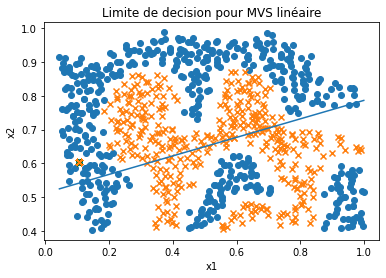

In [111]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Limite de decision pour MVS linéaire")

plt.plot([x1_min, x1_max], [x2_min, x2_max])

Affichons la limite de décision avec le noyau Gaussien

In [118]:
rbf_svc_test = svm.SVC(kernel='rbf', gamma=100, C=1).fit(X, y.ravel())

C:\Users\YsPC\AppData\Local\Temp\ipykernel_8100\4244677893.py:9: UserWarning: No contour levels were found within the data range.
  plt.contour(a,b,z,0, colors='green', linewidth=2)
C:\Users\YsPC\AppData\Local\Temp\ipykernel_8100\4244677893.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(a,b,z,0, colors='green', linewidth=2)


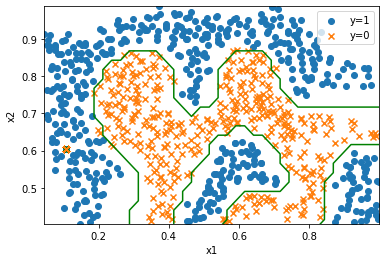

In [119]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
a = np.linspace(-1, 1.5, 100)
b = np.linspace(-1, 1.5, 100)
z = np.zeros((len(a), len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    z[j,i] = rbf_svc_test.predict(np.c_[a[i], b[j]])
plt.contour(a,b,z,0, colors='green', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
#plt.axis([0, 1, 0.1, 1])
plt.axis([X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()])
plt.show()

C:\Users\YsPC\AppData\Local\Temp\ipykernel_8100\2764655644.py:12: UserWarning: No contour levels were found within the data range.
  plt.contour(a,b,z,0, colors='green', linewidth=2)
C:\Users\YsPC\AppData\Local\Temp\ipykernel_8100\2764655644.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(a,b,z,0, colors='green', linewidth=2)


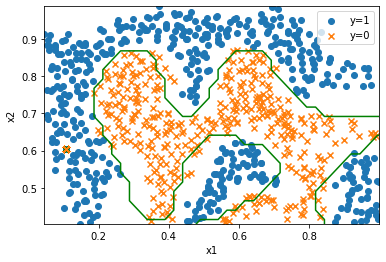

In [54]:
poly_svc_test = svm.SVC(kernel='poly', degree=8, C=1.5, gamma = 'scale', coef0=1).fit(X, y.ravel())


plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
a = np.linspace(-1, 1.5, 100)
b = np.linspace(-1, 1.5, 100)
z = np.zeros((len(a), len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    z[j,i] = poly_svc_test.predict(np.c_[a[i], b[j]])
plt.contour(a,b,z,0, colors='green', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
#plt.axis([0, 1, 0.1, 1])
plt.axis([X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()])
plt.show()

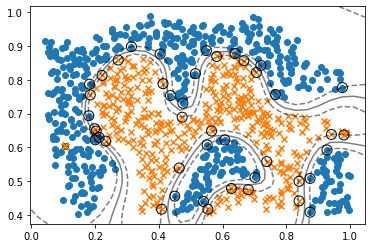

In [96]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


# fit the model, don't regularize for illustration purposes
rbf_svc_support = svm.SVC(kernel='rbf', gamma=50, C=70).fit(X, y.ravel())

# plot the decision function
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_svc_support.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    rbf_svc_support.support_vectors_[:, 0],
    rbf_svc_support.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


In [109]:
print(rbf_svc_support.intercept_)
print(rbf_svc_support.support_)
print(rbf_svc_support.support_vectors_.shape)
print(rbf_svc_support.dual_coef_)


[0.76889263]
[239 255 277 405 549 562 572 639 646 648 674 678 681 754 756 759 766 767
 773 805 811 812 109 110 158 160 168 328 329 340 409 427 435 530 576 586
 617 619 620 699 707 814 834 853]
(44, 2)
[[-63.39558704 -10.8868549  -36.13902171 -20.22096     -1.82938788
  -11.57047398 -30.03425593  -6.18173569 -22.48538666  -5.31291429
  -29.37037304 -38.61679441 -11.07723208  -3.33403028  -2.25829682
  -70.         -70.         -44.92581484 -15.43161065 -52.22625711
  -52.58758985  -2.97174376   6.09381588  12.26752962  10.6074487
    4.36786304  49.30682481  70.          15.42705747   2.53793481
    4.40839228  65.34646942  26.99871048  70.          70.
   19.74947016  12.53442784   4.42251556  70.          48.53871411
    0.89899104  11.02464834  13.69314481  12.63236253]]


Un autre ensemble de données pour la visualisation des vecteurs de support

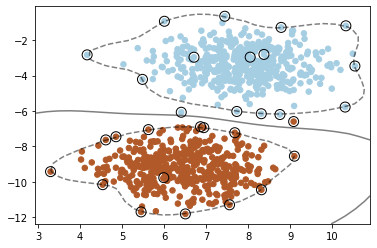

In [55]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# we create 40 separable points
X, y = make_blobs(n_samples=863, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="rbf", C=1.5, gamma = 0.32)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Travail à faire
- 1) Nous aimerions bien choisir les paramètre de notre VMS ainsi que son type afin d'arriver à une limite de decision qui ressemblerai cis-bas.
- - Definir également le role de chaque paramètre.
- - Comprende et expliquer les sorties des MVS en utilisant sklearn
- - le lien peut vous aider  <link href="https://scikit-learn.org/stable/modules/svm.html" />
- 2) Nous aimerions dessiner les vecteurs de support pour notre ensemble de données.
- 3) Ce TP doit obligatoirement être accompagné d'un rapport qui devra contenir votre comprehension et analyse de ces paramètres.

<img src="goodBoundary.png" alt="Drawing" align ="left" style="width: 300px;"/>



# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 09 Mai 2022 à 22h


In [56]:
# bonne chance